In [1]:
import pandas as pd

# Load CSV from raw data folder
df = pd.read_csv('../data/raw/tesla_stock.csv')

# Preview data
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [2]:
df.info()
df.describe()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3509 entries, 0 to 3508
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3509 non-null   object 
 1   Open       3509 non-null   float64
 2   High       3509 non-null   float64
 3   Low        3509 non-null   float64
 4   Close      3509 non-null   float64
 5   Adj Close  3509 non-null   float64
 6   Volume     3509 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 192.0+ KB


Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [3]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)


In [4]:
# Check for missing values
df.isnull().sum()

# Drop rows with any missing data (or use interpolation)
df = df.dropna()

# Remove duplicates
df = df[~df.index.duplicated(keep='first')]


In [5]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [6]:
df.to_csv('../data/processed/tesla_stock_cleaned.csv')


In [8]:
df = pd.read_csv('../data/processed/tesla_stock_cleaned.csv', parse_dates=['Date'], index_col='Date')

df.head()
df.tail()


,open,high,low,close,adj_close,volume
Date,,,,,,
2024-05-31,178.500000,180.320007,173.820007,178.080002,178.080002,67314600
2024-06-03,178.130005,182.639999,174.490005,176.289993,176.289993,68568900
2024-06-04,174.779999,177.759995,174.000000,174.770004,174.770004,60056300
2024-06-05,175.350006,176.149994,172.130005,175.000000,175.000000,57614800
2024-06-06,174.419998,176.919998,172.729996,175.440002,175.440002,29887849


In [9]:
df.describe()


,open,high,low,close,adj_close,volume
count,3509.000000,3509.000000,3509.000000,3509.000000,3509.000000,3.509000e+03
mean,74.057486,75.666813,72.324719,74.032508,74.032508,9.683246e+07
std,101.999514,104.244555,99.528061,101.915952,101.915952,7.894845e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,11.346000,11.580000,11.037333,11.328667,11.328667,4.716300e+07
50%,17.334000,17.563999,16.974667,17.330667,17.330667,8.203590e+07
75%,147.783340,150.940002,143.566666,147.383331,147.383331,1.226560e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [10]:
df.isnull().sum()
df.duplicated().sum()


np.int64(0)

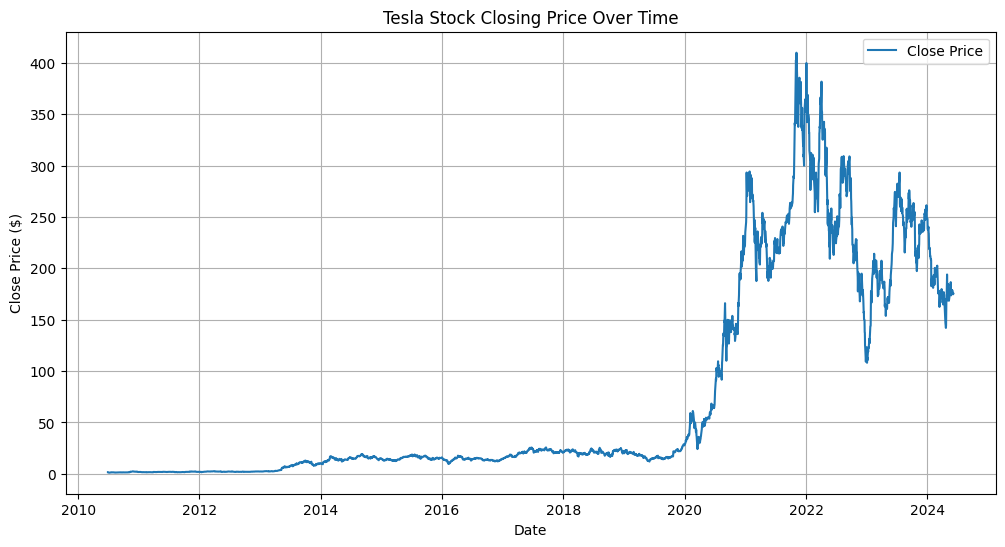

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df['close'], label='Close Price')
plt.title("Tesla Stock Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Close Price ($)")
plt.legend()
plt.grid(True)
plt.show()


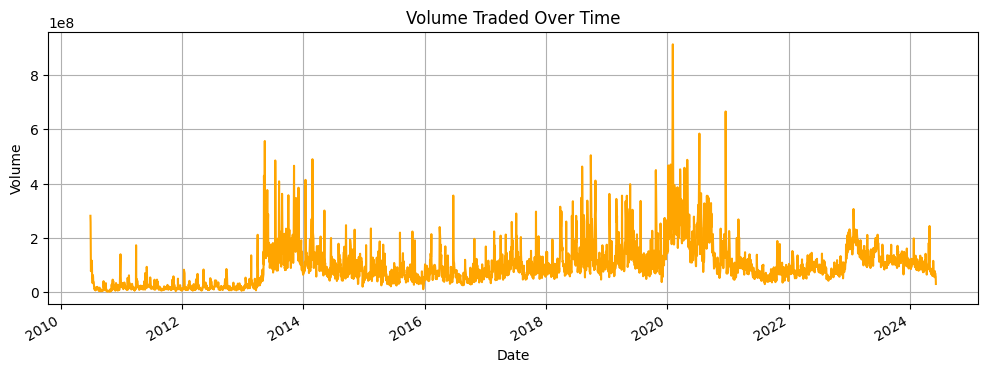

In [13]:
plt.figure(figsize=(12,4))
df['volume'].plot(color='orange')
plt.title("Volume Traded Over Time")
plt.ylabel("Volume")
plt.grid(True)
plt.show()


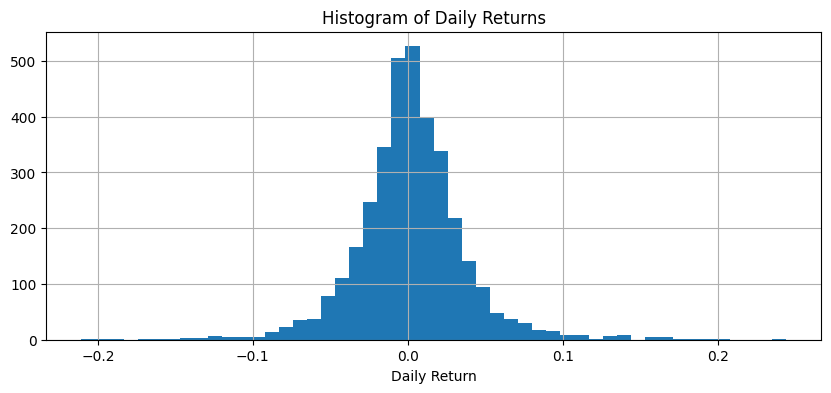

In [14]:
df['Daily_Return'] = df['close'].pct_change()

df['Daily_Return'].hist(bins=50, figsize=(10,4))
plt.title("Histogram of Daily Returns")
plt.xlabel("Daily Return")
plt.grid(True)
plt.show()


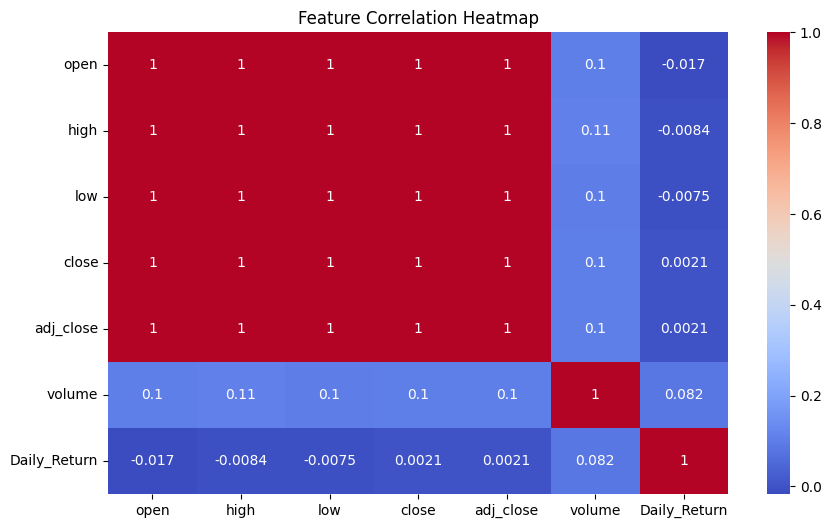

In [15]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


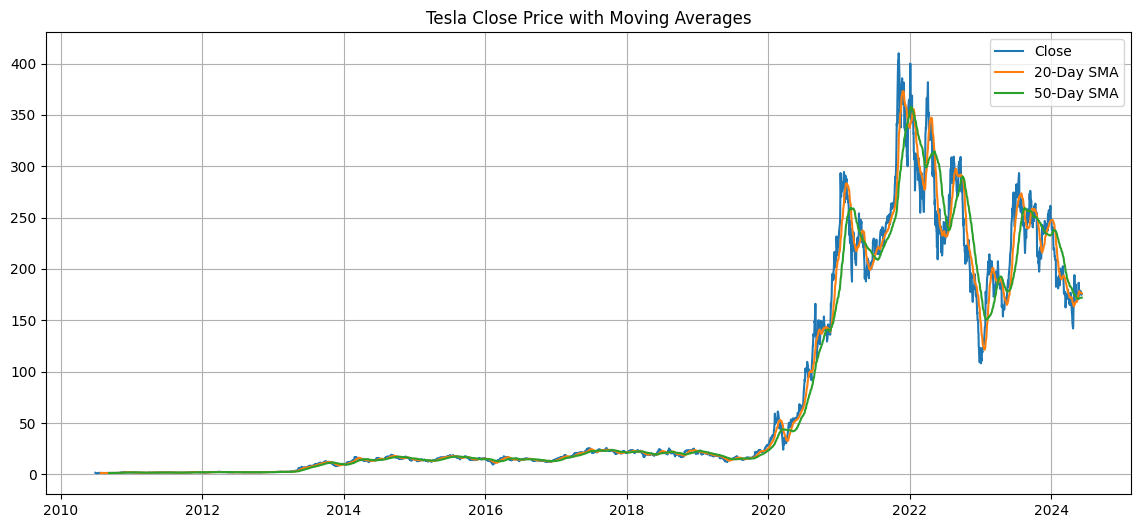

In [16]:
df['SMA_20'] = df['close'].rolling(window=20).mean()
df['SMA_50'] = df['close'].rolling(window=50).mean()

plt.figure(figsize=(14,6))
plt.plot(df['close'], label='Close')
plt.plot(df['SMA_20'], label='20-Day SMA')
plt.plot(df['SMA_50'], label='50-Day SMA')
plt.title("Tesla Close Price with Moving Averages")
plt.legend()
plt.grid(True)
plt.show()
